# Introduction to Linear Regression

*Adapted from Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/)*

Will be using [Pandas](https://pandas.pydata.org/docs/user_guide/10min.html) and [scikit-learn](http://scikit-learn.org/stable/).

Instructions:


*   Questions are marked by the sign ⏩. Provide the answer after the question, either in a code cell or in a text cell (or both).
*   Upload the notebook on the website of the course. Direct emails will be ignored. -- Deadline : one week after the day of the lab.
* Your notebook is an individual work.


In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# this allows plots to appear directly in the notebook
%matplotlib inline

## I. The Dataset

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [2]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)

⏩ **1) Use `data.head()` and `data.head(10)`: describe the dataset.**

In [3]:
print(data.head())
print(data.head(10))

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
       TV  Radio  Newspaper  Sales
1   230.1   37.8       69.2   22.1
2    44.5   39.3       45.1   10.4
3    17.2   45.9       69.3    9.3
4   151.5   41.3       58.5   18.5
5   180.8   10.8       58.4   12.9
6     8.7   48.9       75.0    7.2
7    57.5   32.8       23.5   11.8
8   120.2   19.6       11.6   13.2
9     8.6    2.1        1.0    4.8
10  199.8    2.6       21.2   10.6


What are the features?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the response?
- Sales: sales of a single product in a given market (in thousands of widgets)

⏩ **2) Use data.shape. How many examples are contained in the dataset?**

⏩ **3) Use data.describe() and provide your comments.**

In [4]:
data.shape

(200, 4)

So the dataset contains 200 examples.

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


This function shows us statistical properties of every column of the dataset. It provides us with mean value, standard deviation, min/max values, and 25/50/75 percentiles.

From the mean, we see that, on average, much more money is spent on TV advertisements (147 compared to 23 and 30).


⏩ **4) Use data['Name_column'].hist() to draw the histogram of the sales. Set the parameters in order to plot 20 bins (= bars of the histogram. On the histogram, locate the 25% quantile given by the describe() method of the previous question.**

<Axes: >

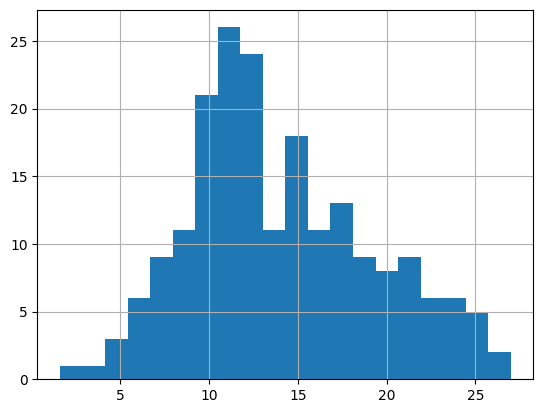

In [6]:
data["Sales"].hist(bins=20)

We see the 25% quantile is at 10.375, which means that 25% of the "Sales" values are smaller than 10.375.

⏩ **5) Comment the result of data.boxplot(). What is the interest of this plot?**

<Axes: >

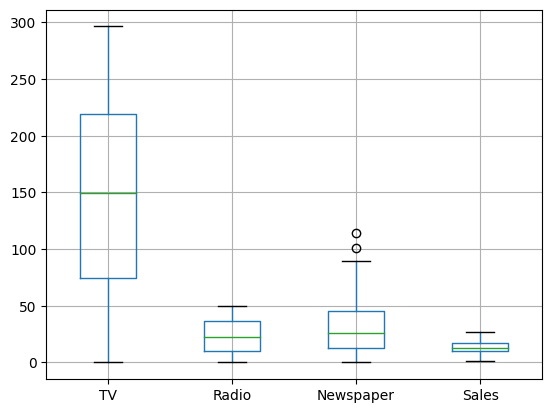

In [7]:
data.boxplot()

This plot shows us many metrics for each column. Whiskers show us min/max value, and the range. For example "TV" has the biggest range from 0 to ~300. Box shows us 25% and 75% quantiles. For example for "TV" they are ~75 and ~220. The line inside the box indicates the median. Also, for the "Newspaper" column, the plot indicates us two outliers.

This plot is useful, because it visualises the numerical data from data.describe(), and we can see how each variable varies.

⏩ **5) Use data.plot(kind='scatter', x=..., y=...) to vizualize the relationship between the features and the response. Comment about the relevance of the use of a linear model.**

<Axes: xlabel='Newspaper', ylabel='Sales'>

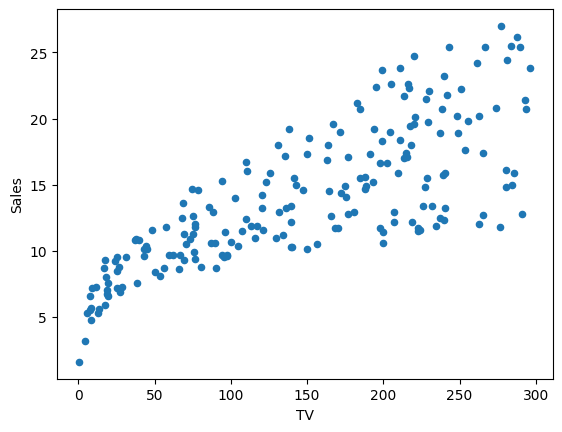

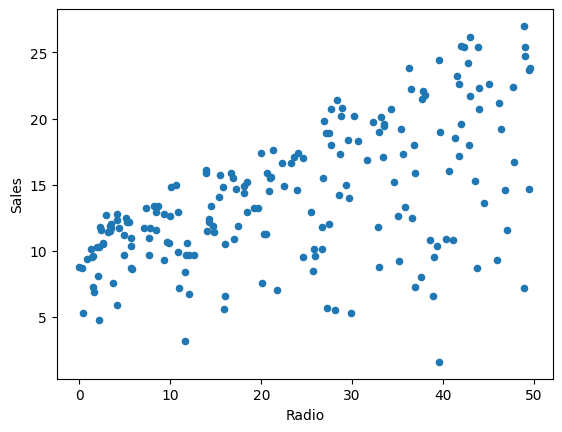

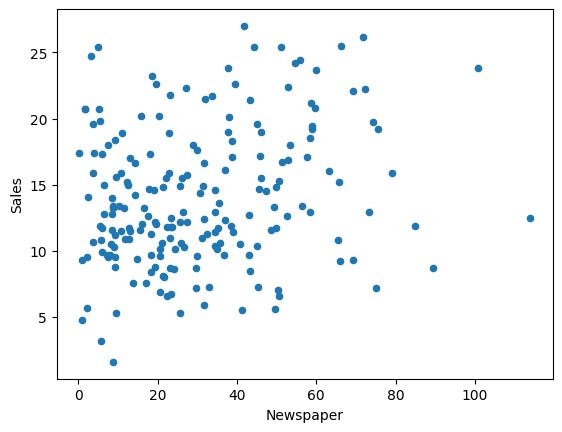

In [8]:
data.plot(kind="scatter", x="TV", y="Sales")
data.plot(kind="scatter", x="Radio", y="Sales")
data.plot(kind="scatter", x="Newspaper", y="Sales")

Feature "TV" is the most correlated with sales, as we see the positive correlation: the more money is spent onr TV ads, the more sales increase.

There is some positive correlation between Sales and "Radio", but smaller than with "TV".

And very little, but positive correlation among Sales and "Newspaper".

Hence, linear model is relevant in this case.

⏩ **6) Use data.corr() in order to plot the correlation coefficients.**

**Comment about the coefficient on the diagonal.**

**What feature is the most correlated to the sales?**

**Plot the correlation matrix as a heatmap using sns.heatmap(...,annot=True)**

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


<Axes: >

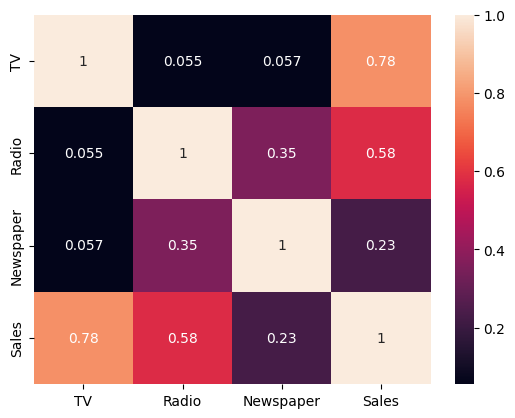

In [9]:
print(data.corr())
sns.heatmap(data.corr(), annot=True)

From the correlation matrix we see similar things as from scatter plots. The most correlated feature with sales is "TV", having coefficient of 0.78, which is pretty close to 1.

On the diagonal the coefficients are 1, because it shows the correlation of feature with itself.

### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## II. Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):
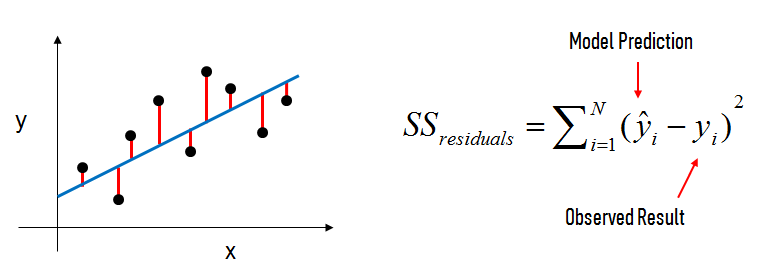

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

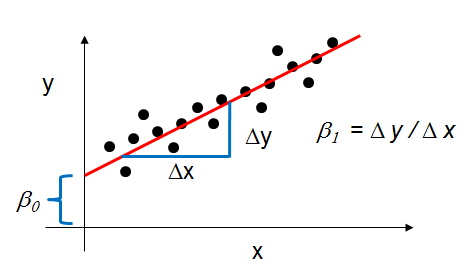





⏩ **7) We are going to do linear regression of the sales with respect to ONE variable amongst 'TV', 'Radio', 'Newspaper'. According to what you have seen from the dataset, which column would you like to keep? Write it down under the form:**

`columns = ['Name of the column you want to keep']`

In [10]:
columns = ["TV"]

Because this feature has the best correlation with sales.

⏩ **8) Run the code below and try to understand it. What are the value of $\beta_0$ and $\beta_1$ of you model?**

In [11]:
from sklearn.linear_model import LinearRegression
ls = LinearRegression()
ls.fit(data[columns],data['Sales'])
ls.intercept_,ls.coef_[0]

(7.032593549127695, 0.04753664043301975)

$\beta_0$ (intercept) of the model is ~7.03, and $\beta_1$ (slope) is ~0.0475.

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

⏩ **9) Let's say that there was a new market where the spend in the advertising channel you considered was $50,000. What would we predict for the Sales in that market? Make the prediction "by hand" using sums and multiplication of numbers.**

For this calculation we will use coefficients values. The predicted Sales in this market would be $ 50000 \$ \cdot \beta_1 + \beta_0 = 50000\$ \cdot 0.047537 + 7.0326 = 2383.8826$ widgets

---



⏩ **10) Use sklearn's predict method to recover the above result:**



```
New_data = pd.DataFrame({'Name of your column' : [the value]})
ls.predict(New_data)[0]
```




In [12]:
New_data = pd.DataFrame({"TV" : [50000]})
ls.predict(New_data)[0]

2383.864615200115

⏩ **11) Using `ls.predict`, generate the predictions $\hat y_i$ for the whole dataset. On the same graph, plot the scattered points $(x_i,y_i)$ and the line passing through the points $(x_i,\hat y_i)$.**

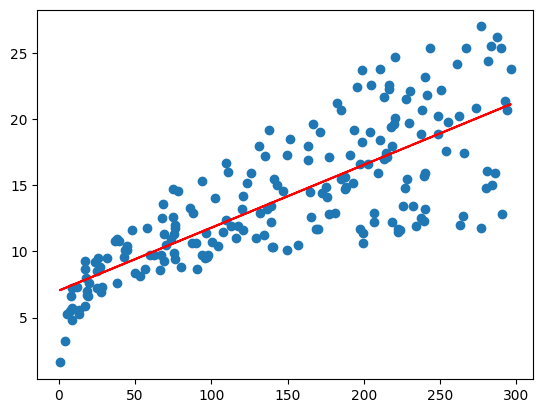

In [13]:
predictions = ls.predict(data.loc[:, ["TV"]])
plt.scatter(data["TV"], data["Sales"])
plt.plot(data["TV"], predictions, c="red")

⏩ **12) Write your comments. How happy are you with the model?**

The model seems to fit pretty well. Dor the lower values of "TV", the fit is more tight. For larger values, the data points deviate a lot around the least squares line.

## III. Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

⏩ **13) Include all the three columns in the model and re-train a least-square estimator using scikit-learn. Provide the values of the coefficients $\beta_i$.**

In [14]:
mlr = LinearRegression()
mlr.fit(data.drop("Sales", axis=1), data['Sales'])
print(f"B_0: {mlr.intercept_}")
print(["B_"+str(i)+": "+str(mlr.coef_[i-1]) for i in range(1,4)])

B_0: 2.938889369459412
['B_1: 0.0457646454553976', 'B_2: 0.18853001691820448', 'B_3: -0.0010374930424763285']


⏩ **14) For a given amount of Radio and Newspaper ad spending, how much is the increase of sells resulting from a $1000 increase in TV ad spending?**

In [15]:
from statistics import mean

predictions = mlr.predict(data.drop("Sales", axis=1))
modified_data = data.copy()
modified_data["TV"] = modified_data["TV"] + 1000
predictions_2 = mlr.predict(modified_data.drop("Sales", axis=1))
mean([predictions_2[i] - predictions[i] for i in range(predictions.shape[0])])

45.7646454553976

on average, the 1000\$ increase in TV ads spending results in 46\$ increase in sells

### Linear Gaussian model and confidence intervals

Our aim is now to compute confidence intervals on each of the coefficients $\beta_i$ at the level 95%. A way to think of a confidence interval is the following: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient. Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

To that end, we make the assumption that the model is homoscedastic, which means linear, Gaussian, and with a constant variance $\sigma^2$:
$$
Y \sim {\mathcal N}(\Phi \beta,\sigma^2 I_N)
$$
where $N$ is the number of sambles, $d=3$ is the number of regressors, $\Phi$ is the $N\times (d+1)$ design matrix containing the values of the regressors (TV, Radio, Newspaper), $\beta=(\beta_0,\dots,\beta_d)^T$ and $\sigma^2$ are the unknown parameters, and $I_N$ is the $N\times N$ identity matrix.

A 95% confidence interval on $\beta_k$ is given by:
$$
\hat\beta_k \pm q \sqrt{\frac {\hat\sigma^2 s_k}N}
$$
where $s_k$ is the $k$th coefficient of the diagonal of $(\Phi^T\Phi)^{-1}$, $\hat \sigma^2$ is the estimated variance of the residuals, given by:
$$
\hat \sigma^2 = \frac{\|Y-\hat Y\|^2}{N-d-1}
$$

⏩ **15) What is $q$ in the above formula?**

q is a coefficient that we need to find from the standard normal distribution table, which shows the area under the curve for the given z-score. We make decision about q depending which confidence interval we need. For example for 95% interval, it will be 1.96


⏩ **16) Draw the histogram of the residuals $e_i=\hat y_i-y_i$, using 20 bins.**

**Without calculating it numerically, what is APPROXIMATELY the mean and the standard deviation?**

**Does it make sense to assume that the residuals are Gaussian?**

(array([ 6., 17., 33., 29., 41., 20., 15.,  9., 13.,  6.,  5.,  2.,  2.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-2.8292226 , -2.24637712, -1.66353163, -1.08068615, -0.49784066,
         0.08500482,  0.66785031,  1.25069579,  1.83354128,  2.41638677,
         2.99923225,  3.58207774,  4.16492322,  4.74776871,  5.33061419,
         5.91345968,  6.49630516,  7.07915065,  7.66199613,  8.24484162,
         8.8276871 ]),
 <BarContainer object of 20 artists>)

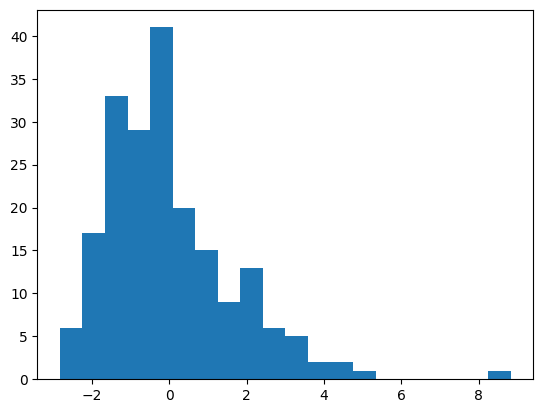

In [16]:
residuals = [predictions[i] - data.iloc[i,-1] for i in range(predictions.shape[0])]
plt.hist(residuals, bins=20)

mean is approximately 503, and the standart deviation is 4. The assumption that residuals are gaussian is relevant, because this histogram resembles normal distribution curve

The following function computes confidence intervals. The syntax is as follows:


```
confidence_interval(X,y,a,k)
```

where `X` is a $N\times d$ pandas dataframe corresponding to the design matrix, `y` is a pandas series corresponding to the labels, $a$ is the confidence level between 0 and 1 (typically set to 0.95), and $k\in\{0,1,\dots,d\}$ represents the variable you would like to consider.

⏩ **17) Compute the confidence intervals for the 3 variables.**

In [17]:
def confidence_interval(X,y,a,k):
  assert(a<1)
  (N,d) = X.shape
  lsf = LinearRegression()
  lsf.fit(X,y)
  variance = np.linalg.norm(y.values-lsf.predict(X))**2/(N-d-1)
  Phi = np.concatenate((np.reshape(np.ones(N),(N,1)),X.to_numpy()),axis=1)
  s = np.diag(np.linalg.inv(np.dot(Phi.T,Phi)))[k]
  q = stats.t(df=N-d-1).ppf(1-(1-a)/2)
  return (lsf.coef_[k-1]-q*np.sqrt(variance*s/N),lsf.coef_[k-1]+q*np.sqrt(variance*s/N))

In [18]:
confidence_intervals_95 = [confidence_interval(data.drop("Sales", axis=1), data["Sales"], 0.95, k) for k in range(0,3)]
print(confidence_intervals_95)

[(-0.04453354672146339, 0.04245856063651073), (0.045570125082648495, 0.04595916582814671), (0.1873291679143402, 0.18973086592206875)]


the confidence intervals above are for Newspaper, TV, and radio respectively.


⏩ **18) Compute confidence intervals at 99%. Based on this result, if you wanted to eliminate one feature from the model, which one would it be? Explain.**

In [19]:
confidence_intervals_99 = [confidence_interval(data.drop("Sales", axis=1), data["Sales"], 0.99, k) for k in range(0,3)]
print(confidence_intervals_99)

[(-0.05840638505570548, 0.05633139897075282), (0.045508083829348116, 0.04602120708144709), (0.18694616341886588, 0.19011387041754307)]


I would eliminate Newspaper. Its confidence interval is very wide, and contains 0.
Other features, as radio and TV are good to leave, since they have narrow intervals, not containing zero.

## IV. Model selection by cross-validation

Consider we seek to choose between two models:


*   The first one includes all the columns `TV`, `Radio`, `Newspaper`
*   The second one includes only `TV` and `Radio`

Which one should one choose?

**Cross-validation.** provides a reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

⏩ **19) Use sklearn `train_test_split` method to spli the data into a train and a test set (see the doc [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). Then, fit two linear regressors on the train set only: one using all features, the other using only `TV` and`Radio`.**

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop("Sales", axis=1), data["Sales"], test_size=0.3, random_state=42)

TRN_model = LinearRegression() #model with TV, radio, newspaper
TRN_model.fit(X_train, y_train)

TR_model = LinearRegression()
TR_model.fit(X_train.drop("Newspaper", axis=1), y_train) #model with TV, radio


LinearRegression()

⏩ **20) Use sklearn `mean_squared_error` (doc [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)) to compare the mean squared error of both models, on the test set.**

In [21]:
from sklearn.metrics import mean_squared_error

print("TV, Radio, Newspaper:", mean_squared_error(y_test, TRN_model.predict(X_test)))
print("TV, Radio:", mean_squared_error(y_test, TR_model.predict(X_test.drop("Newspaper", axis=1))))

TV, Radio, Newspaper: 3.79679723671522
TV, Radio: 3.669047054530681


⏩ **21) Observe that the mean square error vary, when you re-run the cells corresponding to Questions 21 and 22. How do you explain this?**

⏩ **22) Between the two models, which one would you recommend? Justify.**

⏩ **23) To choose between two models, your method seems to depend on the ratio of the test set versus the train set. Can you see a more rigorous method allowing to cross-validate the model?**

21) it varies because each time the dataset is divided randomly, and ends up being split differently. This explains different performance on the test set. We can fix this by setting parameter random_state, which will randomize the split consistently with each run. (and therefore generate the same result)

22) The model with only two parameters (Radio & TV) performs better, since it has smaller mean square error between the predicted values and ground truth. Thus, i would recommend the second model.

23) Better method would be to use K-Folds cross validation.  In this method, the data gets shuffled and split into k equal parts. Then, during each iteration, the separate model is trained on k-1 parts, and 1 part is used for test. Inn the next iteration, another part will be used for testing. If we increase k, the method would perform better, but it also would require more computational power.

## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.